In [1]:
import imageio
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

%load_ext autoreload
%autoreload 2
%matplotlib inline
import features
import utils
import test
import train

/Users/liucan/anaconda/lib/python3.6/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator LinearSVC from version 0.20.0 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


## Visualize Feature Extraction

In [5]:
path = "../INRIAPerson/train_64x128_H96/pos/crop001001a.png"

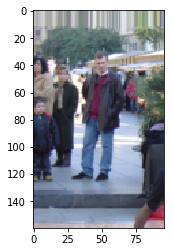

In [8]:
# Image without cropping
img = utils.load_image(path, crop = False)
plt.imshow(img)

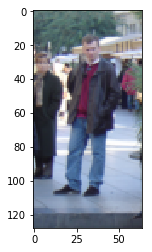

In [10]:
# Cropped image to 64 x 128 pixels
# We will use this cropped image to train the model
cimg = utils.load_image(path, crop = True)
plt.imshow(cimg)

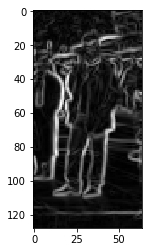

In [11]:
# Compute graident with the sobel operator
mag, theta = features.gradient(cimg)
plt.imshow(mag, cmap = "gray")

In [19]:
# Extract feature descriptors for the detector window 
# 1. bin the gradient
# 2. each cell vote for the orientations -> (9,) vector associated with each cell
# 3. contrast normalization for each block
fd = features.HOG(cimg)

In [20]:
# Check feature dimension
fd.shape

(3780,)

In [84]:
# Visualize HOG

## Pedestrian detection for a single image

In [2]:
filename = "../INRIAPerson/Test/pos/crop001661.png"

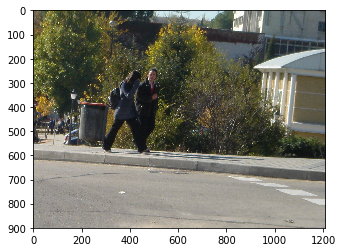

In [35]:
# Load and resize image to 320 x 240
#img = Image.open(filename).resize((320, 240))
#img = np.array(img) / 255
#plt.imshow(img)
img = utils.load_image(filename, crop = False)
plt.imshow(img)

In [77]:
import test
detect = test.recognize(filename, stride = 16, wsize = (128, 64))

/Users/liucan/anaconda/lib/python3.6/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator LinearSVC from version 0.20.0 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


image size: (240, 320, 3)
number of windows: 136
rblocks: 29, cblocks: 39
extract features...
predict...
block left: 0, block top: 0
block right: 7, block buttom: 15
block left: 2, block top: 0
block right: 9, block buttom: 15
block left: 4, block top: 0
block right: 11, block buttom: 15
block left: 6, block top: 0
block right: 13, block buttom: 15
block left: 8, block top: 0
block right: 15, block buttom: 15
block left: 10, block top: 0
block right: 17, block buttom: 15
block left: 12, block top: 0
block right: 19, block buttom: 15
block left: 14, block top: 0
block right: 21, block buttom: 15
block left: 16, block top: 0
block right: 23, block buttom: 15
block left: 18, block top: 0
block right: 25, block buttom: 15
block left: 20, block top: 0
block right: 27, block buttom: 15
block left: 22, block top: 0
block right: 29, block buttom: 15
block left: 24, block top: 0
block right: 31, block buttom: 15
block left: 26, block top: 0
block right: 33, block buttom: 15
block left: 28, bloc

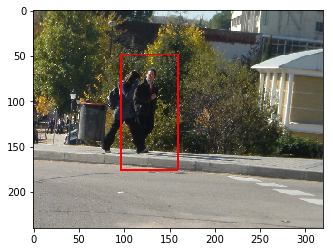

In [76]:
plt.imshow(detect)

In [25]:
detect

Array([[[125, 107,  93],
        [127, 109,  97],
        [121, 103,  91],
        ..., 
        [ 50,  54,  65],
        [ 46,  55,  64],
        [ 45,  55,  64]],

       [[123, 108,  89],
        [124, 108,  92],
        [118, 107,  89],
        ..., 
        [ 65,  70,  73],
        [ 55,  64,  63],
        [ 48,  58,  59]],

       [[117, 105,  83],
        [117, 104,  85],
        [117, 105,  89],
        ..., 
        [ 62,  73,  75],
        [ 58,  74,  73],
        [ 56,  72,  72]],

       ..., 
       [[162, 157, 154],
        [159, 154, 151],
        [152, 147, 143],
        ..., 
        [163, 162, 160],
        [165, 164, 162],
        [165, 164, 162]],

       [[156, 148, 146],
        [146, 136, 135],
        [149, 141, 138],
        ..., 
        [156, 156, 156],
        [156, 156, 154],
        [158, 158, 156]],

       [[151, 145, 145],
        [123, 117, 117],
        [152, 151, 147],
        ..., 
        [150, 151, 146],
        [150, 151, 145],
        [153, 154,

In [11]:
66600 / 4

16650.0

In [15]:
(900 - 16) // 8 + 1

111

In [16]:
(1210 - 16) // 8 + 1

150

In [17]:
111 * 150

16650